In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd

In [0]:
df4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df4.csv")
df4.drop('Unnamed: 0', axis=1, inplace=True)
df4

,collision_no,year,month,day,hour,longitude,latitude,# involved,# injured,# KSI,# fatalities,road_class_Collector,road_class_Expressway,road_class_Expressway Ramp,road_class_Laneway,road_class_Local,road_class_Major Arterial,road_class_Major Arterial Ramp,road_class_Major Shoreline,road_class_Minor Arterial,road_class_Other,road_class_Private Property,road_surface_cond_DRY,road_surface_cond_ICE,road_surface_cond_LOOSE SAND OR GRAVEL,road_surface_cond_LOOSE SNOW,road_surface_cond_MUD,road_surface_cond_OTHER,road_surface_cond_PACKED SNOW,road_surface_cond_SLUSH,road_surface_cond_SPILLED LIQUID,road_surface_cond_WET,visibility_CLEAR,visibility_DRIFTING SNOW,"visibility_FOG, MIST, SMOKE, DUST",visibility_FREEZING RAIN,visibility_OTHER,visibility_RAIN,visibility_SNOW,visibility_STRONG WIND,...,"light_DUSK, ARTIFICIAL",light_OTHER,impact_type_ANGLE,impact_type_APPROACHING,impact_type_CYCLIST COLLISIONS,impact_type_OTHER,impact_type_PEDESTRIAN COLLISIONS,impact_type_REAR END,impact_type_SIDESWIPE,impact_type_SMV OTHER,impact_type_SMV UNATTENDED VEHICLE,impact_type_TURNING MOVEMENT,involved_class_ANIMAL,involved_class_CYCLIST,involved_class_CYCLIST - NOT HIT,involved_class_CYCLIST PASSENGER,involved_class_DRIVER,involved_class_DRIVER - NOT HIT,involved_class_IN-LINE SKATER,involved_class_MOPED DRIVER,involved_class_MOPED PASSENGER,involved_class_MOTORCYCLE DRIVER,involved_class_MOTORCYCLE PASSENGER,involved_class_OTHER,involved_class_OTHER PROPERTY OWNER,involved_class_PASSENGER,involved_class_PEDESTRIAN,involved_class_PEDESTRIAN - NOT HIT,involved_class_RUNAWAY - NO DRIVER,involved_class_TRAILER OWNER,involved_class_TRUCK DRIVER,involved_class_UNKNOWN - FTR,involved_class_VEHICLE OWNER,involved_class_WHEELCHAIR,involved_class_WITNESS,involved_injury_class_FATAL,involved_injury_class_MAJOR,involved_injury_class_MINIMAL,involved_injury_class_MINOR,involved_injury_class_NONE
0,1,2000,9,0,8,-79.456317,43.727732,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,2000,9,0,8,-79.456317,43.727732,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,2000,9,0,8,-79.456271,43.727698,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,2000,9,0,8,-79.456271,43.727698,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2,2000,9,0,8,-79.456271,43.727698,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334484,1038396,2019,5,4,22,-79.351940,43.677554,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2334485,1038396,2019,5,4,22,-79.351940,43.677554,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2334486,1038397,2019,7,5,22,-79.314602,43.678378,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2334487,1038398,2019,10,1,9,-79.372333,43.651519,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
df4.columns

Index(['collision_no', 'year', 'month', 'day', 'hour', 'longitude', 'latitude',
       '# involved', '# injured', '# KSI', '# fatalities',
       'road_class_Collector', 'road_class_Expressway',
       'road_class_Expressway Ramp', 'road_class_Laneway', 'road_class_Local',
       'road_class_Major Arterial', 'road_class_Major Arterial Ramp',
       'road_class_Major Shoreline', 'road_class_Minor Arterial',
       'road_class_Other', 'road_class_Private Property',
       'road_surface_cond_DRY', 'road_surface_cond_ICE',
       'road_surface_cond_LOOSE SAND OR GRAVEL',
       'road_surface_cond_LOOSE SNOW', 'road_surface_cond_MUD',
       'road_surface_cond_OTHER', 'road_surface_cond_PACKED SNOW',
       'road_surface_cond_SLUSH', 'road_surface_cond_SPILLED LIQUID',
       'road_surface_cond_WET', 'visibility_CLEAR', 'visibility_DRIFTING SNOW',
       'visibility_FOG, MIST, SMOKE, DUST', 'visibility_FREEZING RAIN',
       'visibility_OTHER', 'visibility_RAIN', 'visibility_SNOW',
       '

In [0]:
# Features for the classification of '# KSI'
features = list(df4.columns[2:7]) + list(df4.columns[11:-5])  # NOT including: 'collision_no', 'year', '# involved', '# injured', '# KSI', '# fatalities'
                                                                             # 'involved_injury_class_FATAL', 'involved_injury_class_MAJOR', 'involved_injury_class_MINIMAL', 
                                                                             # 'involved_injury_class_MINOR', 'involved_injury_class_NONE'
features

['month',
 'day',
 'hour',
 'longitude',
 'latitude',
 'road_class_Collector',
 'road_class_Expressway',
 'road_class_Expressway Ramp',
 'road_class_Laneway',
 'road_class_Local',
 'road_class_Major Arterial',
 'road_class_Major Arterial Ramp',
 'road_class_Major Shoreline',
 'road_class_Minor Arterial',
 'road_class_Other',
 'road_class_Private Property',
 'road_surface_cond_DRY',
 'road_surface_cond_ICE',
 'road_surface_cond_LOOSE SAND OR GRAVEL',
 'road_surface_cond_LOOSE SNOW',
 'road_surface_cond_MUD',
 'road_surface_cond_OTHER',
 'road_surface_cond_PACKED SNOW',
 'road_surface_cond_SLUSH',
 'road_surface_cond_SPILLED LIQUID',
 'road_surface_cond_WET',
 'visibility_CLEAR',
 'visibility_DRIFTING SNOW',
 'visibility_FOG, MIST, SMOKE, DUST',
 'visibility_FREEZING RAIN',
 'visibility_OTHER',
 'visibility_RAIN',
 'visibility_SNOW',
 'visibility_STRONG WIND',
 'light_DARK',
 'light_DARK, ARTIFICIAL',
 'light_DAWN',
 'light_DAWN, ARTIFICIAL',
 'light_DAYLIGHT',
 'light_DAYLIGHT, ARTIFICI

In [0]:
df4_n19 = df4[df4['year']!=2019]  # all years except 2019!!!

# Separating out the features 
x = df4_n19[features]

# Separating out the target
y = df4_n19['# KSI']

In [0]:
import plotly.graph_objects as go

y_value = [df4_n19[df4_n19['# KSI']==0].shape[0], df4_n19[df4_n19['# KSI']==1].shape[0]]
fig = go.Figure(data=[go.Bar(
    x = ['NOT KSI', 'KSI'], 
    y = y_value,
    text = [(i/df4_n19.shape[0])*100 for i in y_value],
    textposition = 'outside',
    texttemplate = '%{text:.1f}'+'%')])
fig.update_layout(title ='',
                  xaxis = dict(
                      title = ''), 
                  yaxis = dict(
                      title = 'Number of people involved in collisions'))
fig.show()

---
## **Baseline (no oversampling)**
---

In [0]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1819212, 76) (1819212,)
Test set: (454804, 76) (454804,)


In [0]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)   # Fit on training set only
x_test = sc.transform(x_test)         # Apply transform to both the training set and the test set

In [0]:
# Baseline prediction (without resampling and PCA) ##########################################################################

In [0]:
# Decision trees frequently perform well on imbalanced data. 
# They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()  # max_depth=1000, random_state=42  | n_estimators=100
clf.fit(x_train, y_train)

# Predicting the test set results
y_pred = clf.predict(x_test)

Accuracy:  0.9954815700829368


[Text(0, 0.5, '- (NOT KSI)'), Text(0, 1.5, '+ (KSI)')]

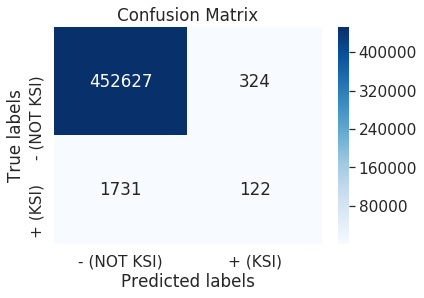

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt     

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])
ax.yaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0 (NOT KSI)', '1 (KSI)']))

              precision    recall  f1-score   support

 0 (NOT KSI)       1.00      1.00      1.00    452951
     1 (KSI)       0.27      0.07      0.11      1853

    accuracy                           1.00    454804
   macro avg       0.63      0.53      0.55    454804
weighted avg       0.99      1.00      0.99    454804



---
## **Oversampling**
Always split into test and train sets BEFORE trying oversampling techniques! <br>
Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. <br>
This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

---





In [0]:
# Splitting the dataset into the training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1819212, 76) (1819212,)
Test set: (454804, 76) (454804,)


In [0]:
# concatenate our training data back together
xy_train = pd.concat([x_train, y_train], axis=1)

In [0]:
# separate minority and majority classes
not_ksi = xy_train[xy_train['# KSI']==0]
ksi = xy_train[xy_train['# KSI']==1]

In [0]:
# upsample minority
from sklearn.utils import resample

ksi_upsampled = resample(ksi,
                          replace=True, # sample with replacement
                          n_samples=len(not_ksi), # match number in majority class
                          random_state=27) # reproducible results

In [0]:
# combine majority and upsampled minority
upsampled = pd.concat([not_ksi, ksi_upsampled])

In [0]:
# check new class counts
upsampled['# KSI'].value_counts()

1    1811637
0    1811637
Name: # KSI, dtype: int64

In [0]:
upsampled

,month,day,hour,longitude,latitude,road_class_Collector,road_class_Expressway,road_class_Expressway Ramp,road_class_Laneway,road_class_Local,road_class_Major Arterial,road_class_Major Arterial Ramp,road_class_Major Shoreline,road_class_Minor Arterial,road_class_Other,road_class_Private Property,road_surface_cond_DRY,road_surface_cond_ICE,road_surface_cond_LOOSE SAND OR GRAVEL,road_surface_cond_LOOSE SNOW,road_surface_cond_MUD,road_surface_cond_OTHER,road_surface_cond_PACKED SNOW,road_surface_cond_SLUSH,road_surface_cond_SPILLED LIQUID,road_surface_cond_WET,visibility_CLEAR,visibility_DRIFTING SNOW,"visibility_FOG, MIST, SMOKE, DUST",visibility_FREEZING RAIN,visibility_OTHER,visibility_RAIN,visibility_SNOW,visibility_STRONG WIND,light_DARK,"light_DARK, ARTIFICIAL",light_DAWN,"light_DAWN, ARTIFICIAL",light_DAYLIGHT,"light_DAYLIGHT, ARTIFICIAL",light_DUSK,"light_DUSK, ARTIFICIAL",light_OTHER,impact_type_ANGLE,impact_type_APPROACHING,impact_type_CYCLIST COLLISIONS,impact_type_OTHER,impact_type_PEDESTRIAN COLLISIONS,impact_type_REAR END,impact_type_SIDESWIPE,impact_type_SMV OTHER,impact_type_SMV UNATTENDED VEHICLE,impact_type_TURNING MOVEMENT,involved_class_ANIMAL,involved_class_CYCLIST,involved_class_CYCLIST - NOT HIT,involved_class_CYCLIST PASSENGER,involved_class_DRIVER,involved_class_DRIVER - NOT HIT,involved_class_IN-LINE SKATER,involved_class_MOPED DRIVER,involved_class_MOPED PASSENGER,involved_class_MOTORCYCLE DRIVER,involved_class_MOTORCYCLE PASSENGER,involved_class_OTHER,involved_class_OTHER PROPERTY OWNER,involved_class_PASSENGER,involved_class_PEDESTRIAN,involved_class_PEDESTRIAN - NOT HIT,involved_class_RUNAWAY - NO DRIVER,involved_class_TRAILER OWNER,involved_class_TRUCK DRIVER,involved_class_UNKNOWN - FTR,involved_class_VEHICLE OWNER,involved_class_WHEELCHAIR,involved_class_WITNESS,# KSI
1319717,2,1,18,-79.450390,43.643145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1610049,9,5,16,-79.393690,43.649345,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1224811,4,1,18,-79.405690,43.641845,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1172370,10,4,18,-79.433790,43.745345,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
665261,6,0,13,-79.454190,43.640145,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168380,11,4,8,-79.542117,43.737780,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
232574,6,3,16,-79.383411,43.662127,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1967302,12,2,21,-79.442401,43.705504,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
585944,11,3,18,-79.302990,43.722845,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [0]:
# After resampling we have an equal ratio of data points for each class! 
# Let’s try our random forest classifier again with the balanced training data.

x_train = upsampled[features]
y_train = upsampled['# KSI']

In [0]:
# Standardizing the features

sc = StandardScaler()
x_train = sc.fit_transform(x_train)   # Fit on training set only
x_test = sc.transform(x_test)         # Apply transform to both the training set and the test set

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()  # n_estimators=10 | max_depth=1000, random_state=42
clf.fit(x_train, y_train)

# Predicting the test set results
y_pred = clf.predict(x_test)

Accuracy:  0.9947010140632009


[Text(0, 0.5, '- (NOT KSI)'), Text(0, 1.5, '+ (KSI)')]

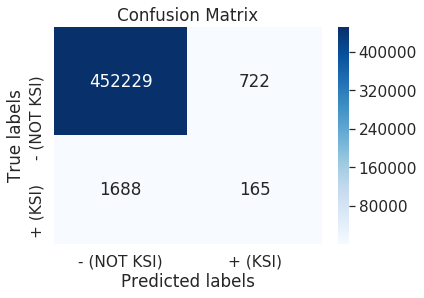

In [0]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)   

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])
ax.yaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])

In [0]:
print(classification_report(y_test, y_pred), target_names=['0 (NOT KSI)', '1 (KSI)'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    452951
           1       0.19      0.09      0.12      1853

    accuracy                           0.99    454804
   macro avg       0.59      0.54      0.56    454804
weighted avg       0.99      0.99      0.99    454804



---
## **SMOTE** 
A technique similar to upsampling is to create synthetic samples. <br>
Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. <br>
SMOTE uses a nearest neighbors algorithm to generate new and synthetic data that we can use for training our model. <br>
Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

---

In [0]:
# Splitting the dataset into the training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1819212, 76) (1819212,)
Test set: (454804, 76) (454804,)


In [0]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [0]:
# Standardizing the features

sc = StandardScaler()
x_train = sc.fit_transform(x_train)   # Fit on training set only
x_test = sc.transform(x_test)         # Apply transform to both the training set and the test set

In [0]:
# After generating our synthetic data points, let’s see how our prediction performs:
clf = RandomForestClassifier()  # n_estimators=10 | max_depth=1000, random_state=42
clf.fit(x_train, y_train)

# Predicting the test set results
y_pred = clf.predict(x_test)

Accuracy:  0.9927331333937256


[Text(0, 0.5, '- (NOT KSI)'), Text(0, 1.5, '+ (KSI)')]

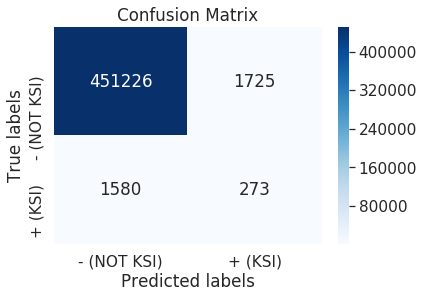

In [0]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)  

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])
ax.yaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])

In [0]:
print(classification_report(y_test, y_pred), target_names=['0 (NOT KSI)', '1 (KSI)']) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    452951
           1       0.14      0.15      0.14      1853

    accuracy                           0.99    454804
   macro avg       0.57      0.57      0.57    454804
weighted avg       0.99      0.99      0.99    454804



---
## **ADASYN** 
**Adaptive Synthetic Sampling Method** is a improved version of SMOTE. <br> 
What it does is same as SMOTE just with a minor improvement. After creating those sample it adds a random small values to the points thus making it more realistic. In other words instead of all the sample being linearly correlated to the parent they have a little more variance in them i.e they are bit scattered.

---

In [0]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1819212, 76) (1819212,)
Test set: (454804, 76) (454804,)


In [0]:
from imblearn.over_sampling import ADASYN

ad = ADASYN(random_state=27, ratio=1.0)
x_train, y_train = ad.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [0]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)   # Fit on training set only
x_test = sc.transform(x_test)         # Apply transform to both the training set and the test set

In [0]:
# After generating our synthetic data points, let’s see how our prediction performs:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()  # n_estimators=10 | max_depth=1000, random_state=42
clf.fit(x_train, y_train)

# Predicting the test set results
y_pred = clf.predict(x_test)

Accuracy:  0.9925440409495079


[Text(0, 0.5, '- (NOT KSI)'), Text(0, 1.5, '+ (KSI)')]

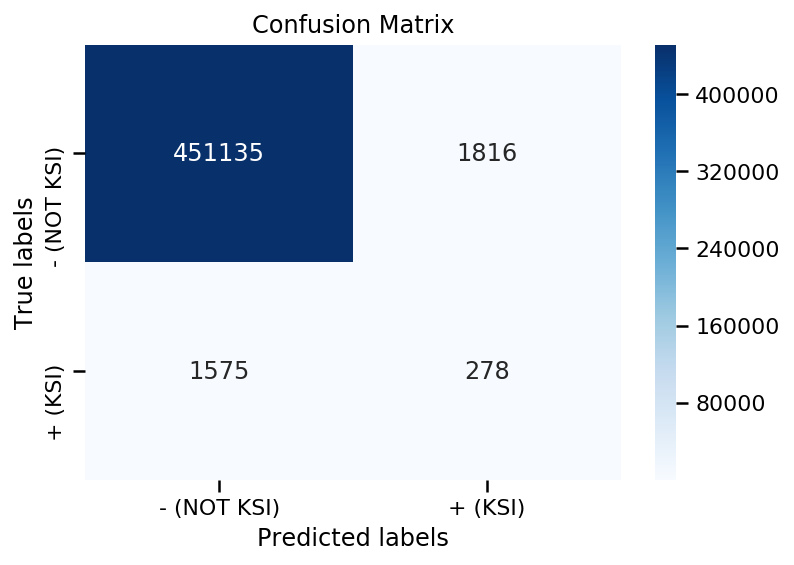

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)  

import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])
ax.yaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0 (NOT KSI)', '1 (KSI)']))

              precision    recall  f1-score   support

 0 (NOT KSI)       1.00      1.00      1.00    452951
     1 (KSI)       0.13      0.15      0.14      1853

    accuracy                           0.99    454804
   macro avg       0.56      0.57      0.57    454804
weighted avg       0.99      0.99      0.99    454804



In [0]:
# Feature importance
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)

fig = go.Figure(data=[go.Bar(
    x = feature_imp, 
    y = feature_imp.index,
    orientation='h',
    text = feature_imp,
    textposition = 'outside',
    texttemplate = '%{text:.2f}'+'%')])
fig.update_layout(title = '',
                  xaxis = dict(
                      title = 'Feature Importance Score'), 
                  yaxis = dict(
                      title = 'Feature'
                  ))
fig.show()

In [0]:
feature_imp_df = pd.DataFrame(feature_imp, columns=['Feature Importance Score'])
feature_imp_df.to_csv('feature_imp_df.csv')
feature_imp_df

,Feature Importance Score
involved_class_DRIVER,1.007364e-01
involved_class_PEDESTRIAN,9.147688e-02
impact_type_PEDESTRIAN COLLISIONS,8.585660e-02
impact_type_REAR END,7.906574e-02
hour,5.575865e-02
...,...
involved_class_MOPED PASSENGER,4.760557e-07
involved_class_CYCLIST - NOT HIT,1.852576e-07
road_class_Major Arterial Ramp,1.547884e-07
involved_class_TRAILER OWNER,7.939512e-08


---
## **Gradient Boosting with XGBoost** 

---

In [0]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1819212, 76) (1819212,)
Test set: (454804, 76) (454804,)


In [0]:
from imblearn.over_sampling import ADASYN

ad = ADASYN(random_state=27, ratio=1.0)
x_train, y_train = ad.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [0]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)   # Fit on training set only
x_test = sc.transform(x_test)         # Apply transform to both the training set and the test set

In [0]:
# After generating our synthetic data points, let’s see how our prediction performs:
import xgboost as xgb

# In order for XGBoost to be able to use our data, we’ll need to transform it into a specific format that XGBoost can handle. 
# That format is called DMatrix: Transform a numpy array of data to DMatrix format:
D_train = xgb.DMatrix(x_train, label=y_train)
D_test = xgb.DMatrix(x_test, label=y_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



In [0]:
# Now that our data is all loaded up, we can define the parameters of our gradient boosting ensemble.
param = {
    'eta': 0.3, 
    'max_depth': 10,  
    'objective': 'multi:softprob',  
    'num_class': 10} 

# steps = 20  # The number of training iterations

The simplest parameters are the `max_depth` (maximum depth of the decision trees being trained), `objective` (the loss function being used), and `num_class` (the number of classes in the dataset). The `eta` algorithm requires special attention.

Gradient Boosting involves creating and adding decision trees to an ensemble model sequentially. New trees are created to correct the residual errors in the predictions from the existing ensemble.

Due to the nature of an ensemble, i.e having several models put together to form what is essentially a very large complicated one, makes this technique prone to overfitting. The `eta` parameter gives us a chance to prevent this overfitting

The `eta` can be thought of more intuitively as a learning rate. Rather than simply adding the predictions of new trees to the ensemble with full weight, the `eta` will be multiplied by the residuals being adding to reduce their weight. This effectively reduces the complexity of the overall model.

It is common to have small values in the range of 0.1 to 0.3. The smaller weighting of these residuals will still help us train a powerful model, but won’t let that model run away into deep complexity where overfitting is more likely to happen.

In [0]:
# We can finally train our model similar to how we do so with Scikit Learn:
xgb_model = xgb.train(param, D_train) # | xgb.train(param, D_train, steps)

In [0]:
# Let’s now run an evaluation. Again the process is very similar to that of training models in Scikit Learn:
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = xgb_model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision (Macro avg) = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall (Macro avg) = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision (Macro avg) = 0.5266840628660452
Recall (Macro avg) = 0.7709921656494801
Accuracy = 0.9576125100043096


Accuracy:  0.9576125100043096


[Text(0, 0.5, '- (NOT KSI)'), Text(0, 1.5, '+ (KSI)')]

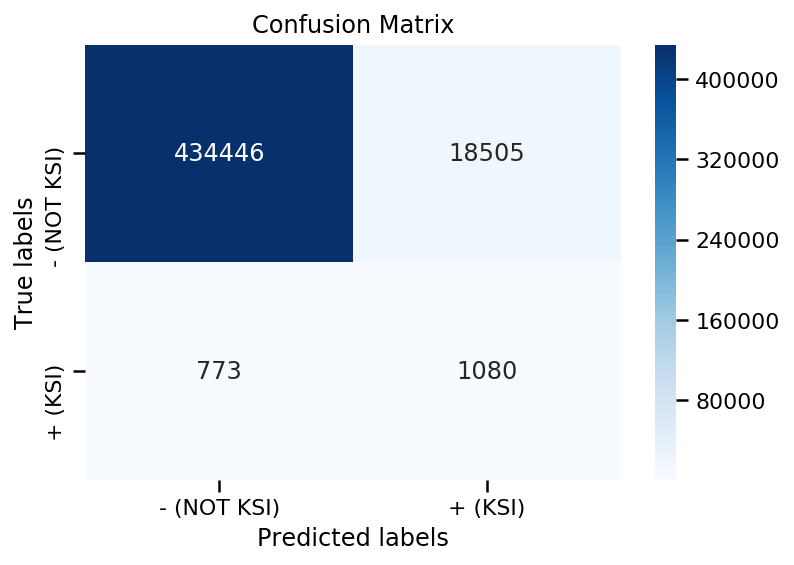

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

preds = xgb_model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
print('Accuracy: ', accuracy_score(y_test, best_preds))
cm = confusion_matrix(y_test, best_preds)  

import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])
ax.yaxis.set_ticklabels(['- (NOT KSI)', '+ (KSI)'])

In [0]:
from sklearn.metrics import classification_report
preds = xgb_model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print(classification_report(y_test, best_preds, target_names=['0 (NOT KSI)', '1 (KSI)']))

              precision    recall  f1-score   support

 0 (NOT KSI)       1.00      0.96      0.98    452951
     1 (KSI)       0.06      0.58      0.10      1853

    accuracy                           0.96    454804
   macro avg       0.53      0.77      0.54    454804
weighted avg       0.99      0.96      0.97    454804



*low* probaility